In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv('/Users/vihaan/Desktop/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# renaming the column names to snake case to be unique
customer_df.columns = [column.lower().replace(' ', '_') for column in customer_df.columns]

In [6]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
# converting date format to year-month-date
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],errors='ignore')


In [8]:
# Adding new columns(effective_year, effective_month) to the dataframe
customer_df['effective_year']= customer_df['effective_to_date'].dt.year
customer_df['effective_month']= customer_df['effective_to_date'].dt.month

In [9]:
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_year,effective_month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.0,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,2011.0,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.0,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,2011.0,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,2011.0,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,2011.0,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2011.0,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2011.0,2.000000


In [10]:
customer_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_year,effective_month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,NaN,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,NaN,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,NaN,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,NaN,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,NaN,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,NaN,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,NaN,0.009305
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,NaN,0.006820
effective_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective_month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,NaN,1.000000


In [11]:
customer_df.corr()['total_claim_amount'].sort_values()

income                          -0.355254
number_of_open_complaints       -0.014241
number_of_policies              -0.002354
months_since_policy_inception    0.003335
effective_month                  0.006820
months_since_last_claim          0.007563
customer_lifetime_value          0.226451
monthly_premium_auto             0.632017
total_claim_amount               1.000000
effective_year                        NaN
Name: total_claim_amount, dtype: float64

converting the effective_year(datatype:datetime64) to a string

In [12]:
customer_df['effective_year'] = customer_df['effective_year'].astype(str)

My Target feature is total_claim_amount. Due to the highest correlation compared to other features

In [13]:
customer_df.corr()['total_claim_amount'].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
effective_month                  0.006820
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

 ##### Dealing with numerical data

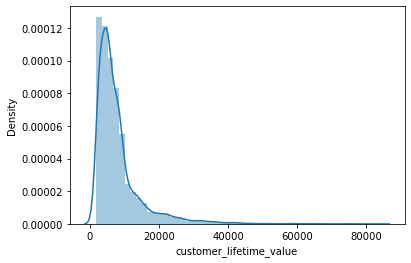

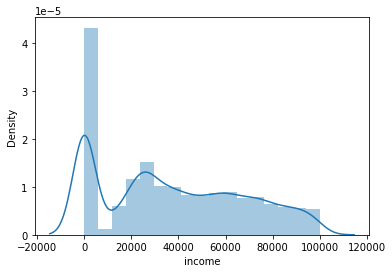

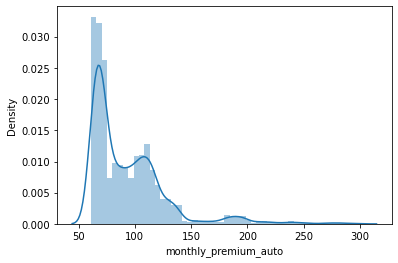

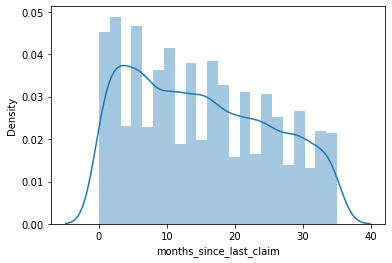

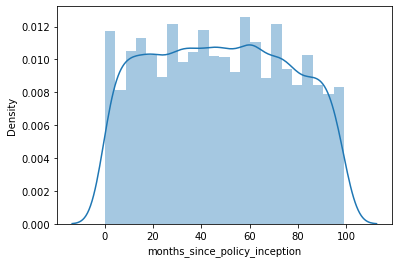

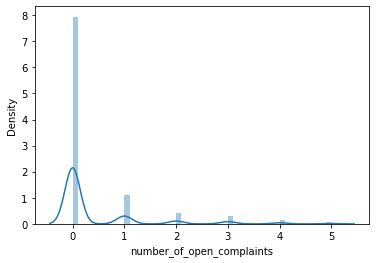

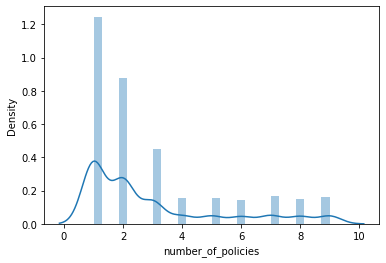

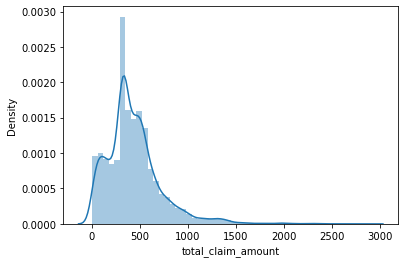

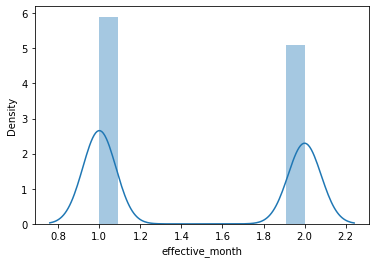

In [14]:
for column in customer_df.select_dtypes(np.number).columns:
    sns.distplot(customer_df[column])
    plt.show()

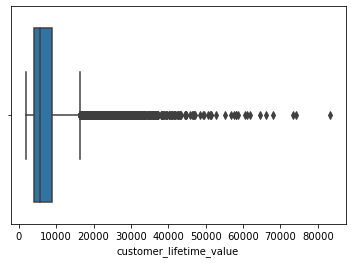

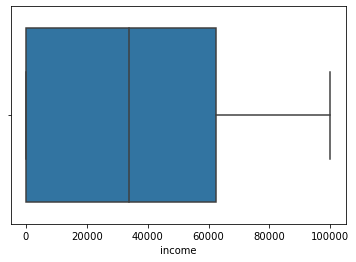

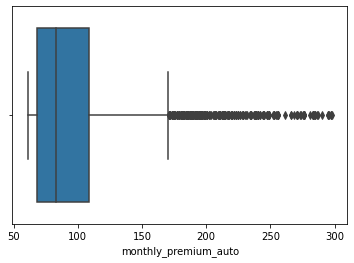

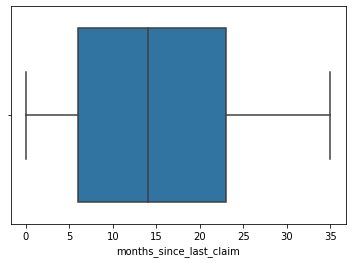

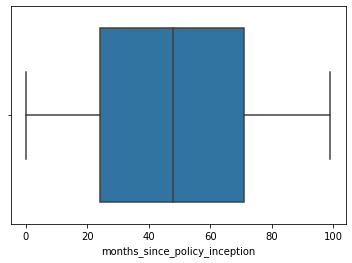

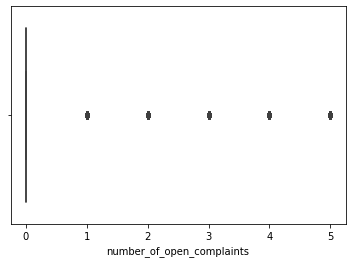

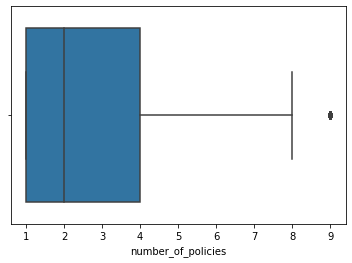

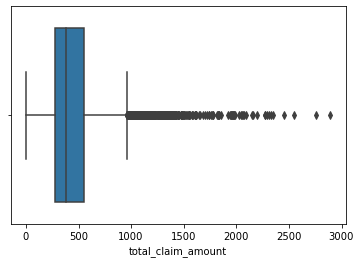

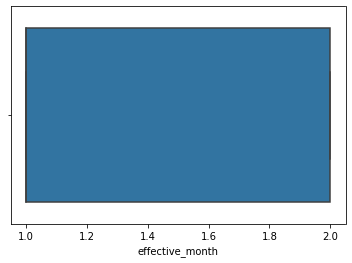

In [15]:
for column in customer_df.select_dtypes(np.number).columns:
    sns.boxplot(customer_df[column])
    plt.show()

##### Categorical data visualization

All the categorical data seems good, because there are no null data, so i decided not to do bucketing them.
Maximum number of our customers are 'Employeed' and 
most of the policy coverage is 'basic' and 
policytype is 'personal auto policy-type'



In [16]:
for col in customer_df.select_dtypes('object'):
    print(customer_df[col].value_counts(), '\n****************\n')

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64 
****************

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 
****************

No     7826
Yes    1308
Name: response, dtype: int64 
****************

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 
****************

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 
****************

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64 
****************

F    4658
M    4476
Name: gender, dtype: int64 
****************

Suburban    5779
Rural       1773
Urban       1582
Name: l

<AxesSubplot:xlabel='state', ylabel='count'>

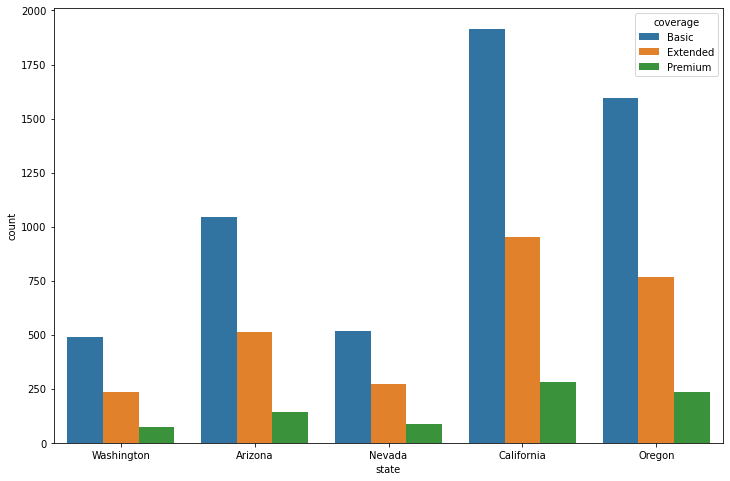

In [17]:
plt.figure(figsize=(12,8))
sns.countplot('state', hue='coverage', data=customer_df)

<AxesSubplot:xlabel='coverage', ylabel='count'>

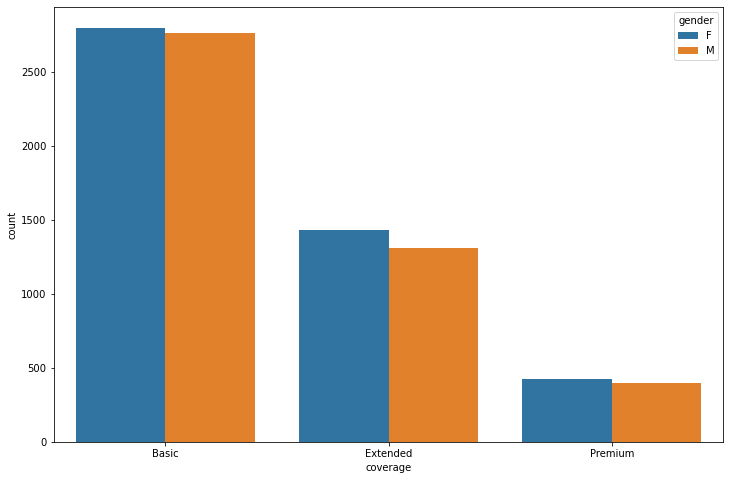

In [18]:
plt.figure(figsize=(12,8))
sns.countplot('coverage', hue='gender', data=customer_df)

<AxesSubplot:xlabel='policy_type', ylabel='count'>

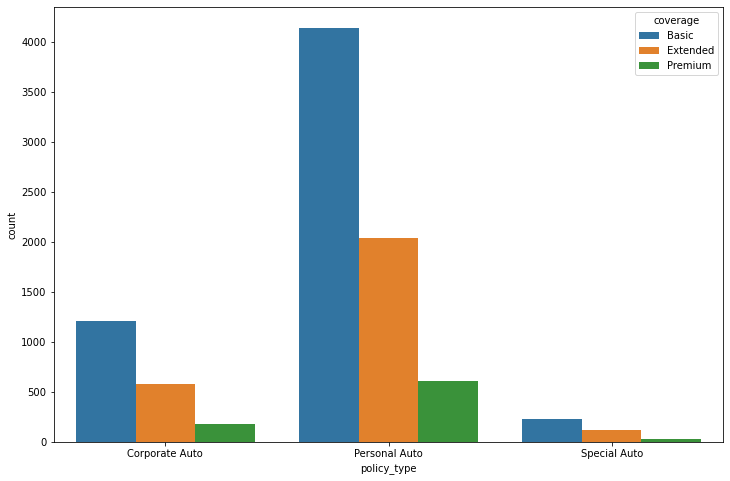

In [19]:
plt.figure(figsize=(12,8))
sns.countplot('policy_type', hue='coverage', data=customer_df)

<AxesSubplot:xlabel='employmentstatus', ylabel='count'>

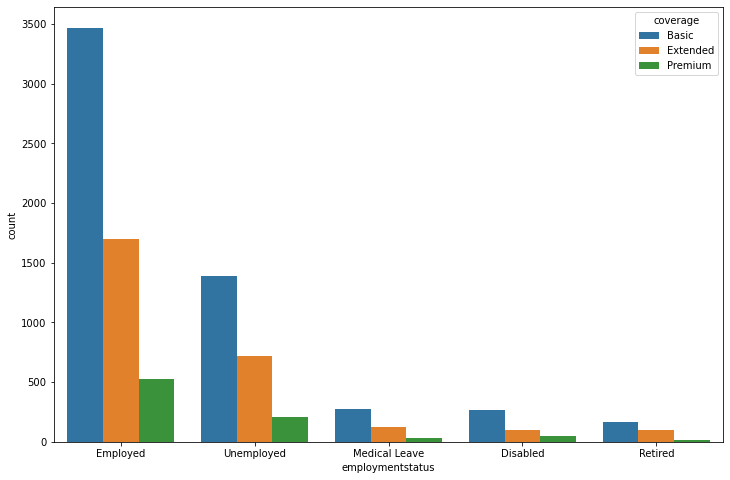

In [20]:
plt.figure(figsize=(12,8))
sns.countplot('employmentstatus', hue='coverage', data=customer_df)

I wouldn't like to remove outliers. Because there are not so many and i don't know how it will effect on my model.
There are no null values in categorical and numerical data

# Lab2 | Cleaning categorical data

In [21]:
customer_df = customer_df.drop('customer', axis = 1)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_year,effective_month
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2


I decided to drop the customer column because it has unique value. No longer needed

In [22]:
numerical_df = customer_df.select_dtypes('number')
categorical_df = customer_df.select_dtypes('object')

<AxesSubplot:xlabel='state', ylabel='total_claim_amount'>

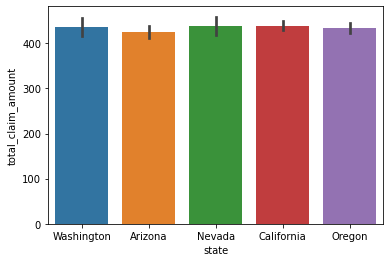

In [23]:
sns.barplot(x="state", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

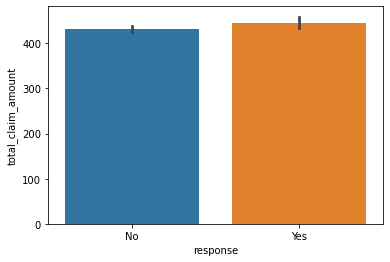

In [24]:
sns.barplot(x="response", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='coverage', ylabel='total_claim_amount'>

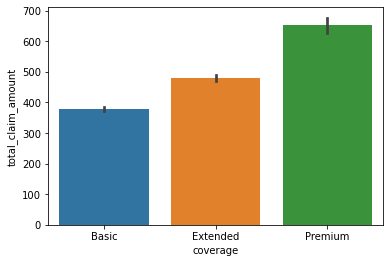

In [25]:
sns.barplot(x="coverage", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='education', ylabel='total_claim_amount'>

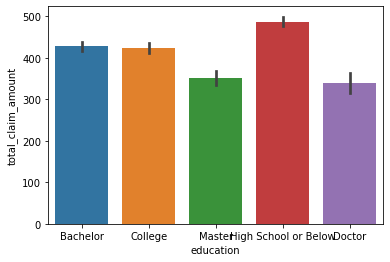

In [26]:
sns.barplot(x="education", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='employmentstatus', ylabel='total_claim_amount'>

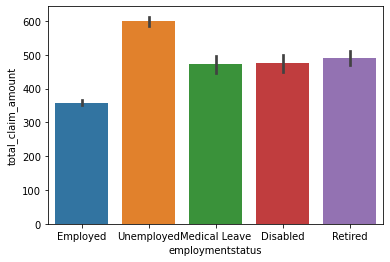

In [27]:
sns.barplot(x="employmentstatus", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='gender', ylabel='total_claim_amount'>

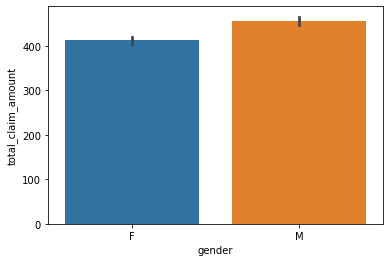

In [28]:
sns.barplot(x="gender", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='location_code', ylabel='total_claim_amount'>

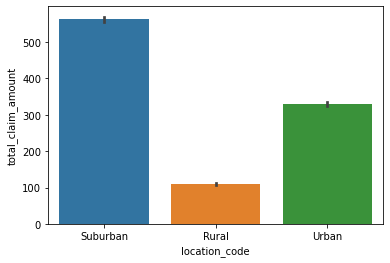

In [29]:
sns.barplot(x="location_code", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='marital_status', ylabel='total_claim_amount'>

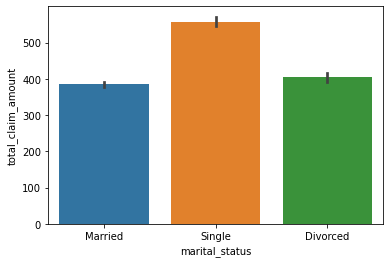

In [30]:
sns.barplot(x="marital_status", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='policy_type', ylabel='total_claim_amount'>

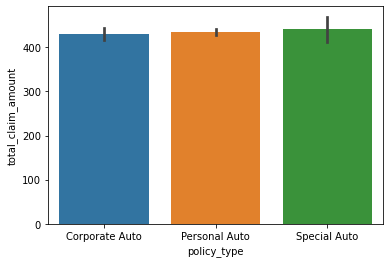

In [31]:
sns.barplot(x="policy_type", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='policy', ylabel='total_claim_amount'>

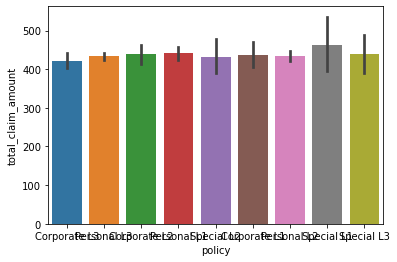

In [32]:
sns.barplot(x="policy", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='renew_offer_type', ylabel='total_claim_amount'>

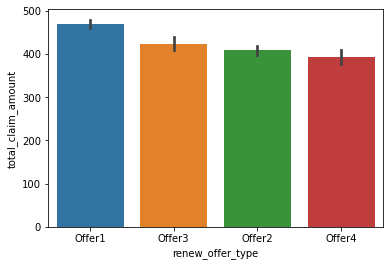

In [33]:
sns.barplot(x="renew_offer_type", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='sales_channel', ylabel='total_claim_amount'>

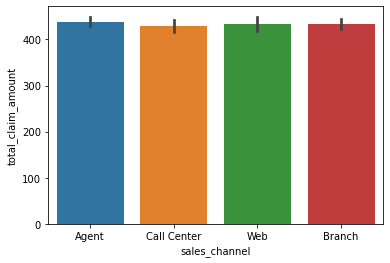

In [34]:
sns.barplot(x="sales_channel", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='vehicle_class', ylabel='total_claim_amount'>

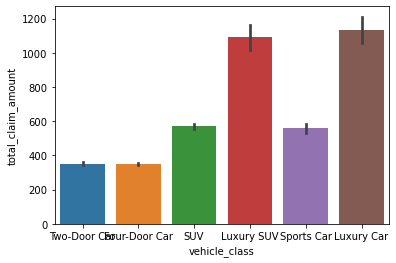

In [35]:
sns.barplot(x="vehicle_class", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='vehicle_size', ylabel='total_claim_amount'>

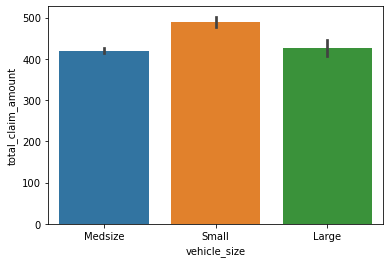

In [36]:
sns.barplot(x="vehicle_size", y="total_claim_amount", data=customer_df)

<AxesSubplot:xlabel='effective_year', ylabel='total_claim_amount'>

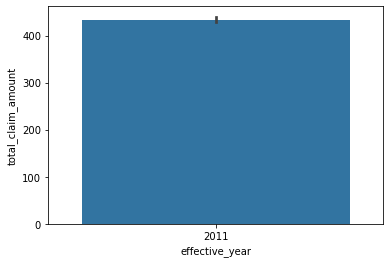

In [37]:
sns.barplot(x="effective_year", y="total_claim_amount", data=customer_df)

####### converting some categorical data into numerical

In [38]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_year,effective_month
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2


In [39]:
for col in customer_df.select_dtypes('object'):
    print(customer_df[col].value_counts(), '\n****************\n')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 
****************

No     7826
Yes    1308
Name: response, dtype: int64 
****************

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 
****************

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 
****************

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64 
****************

F    4658
M    4476
Name: gender, dtype: int64 
****************

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 
****************

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 
****************

Personal Auto     6788
Corporate Auto    1968
Special 

In [40]:
customer_df['state'] = customer_df['state'].map({'California': 0, 'Oregon' : 1, 
                                                 'Arizona': 2, 'Nevada': 3, 'Washington':4})

In [41]:
customer_df['response'] = customer_df['response'].map({'Yes':0, 'No': 1})

In [42]:
customer_df['coverage'] = customer_df['coverage'].map({'Basic':0, 'Extended': 1, 'Premium': 2})

In [43]:
customer_df['education'] = customer_df['education'].map({'Bachelor':0, 'College': 1, 'High School or Below ': 2,
                                                        'Master': 3, 'Doctor': 4})

In [44]:
customer_df['employmentstatus'] = customer_df['employmentstatus'].map({'Employed':0, 'Unemployed': 1, 'Medical Leave': 2,
                                                        'Disabled': 3, 'Retired': 4})

In [45]:
customer_df['gender'] = customer_df['gender'].map({'F':0, 'M': 1})

In [46]:
customer_df['location_code'] = customer_df['location_code'].map({'Suburban':0, 'Rural': 1, 'Urban': 2})

In [47]:
customer_df['policy_type'] = customer_df['policy_type'].map({'Personal Auto':0, 'Corporate Auto': 1, 'Special Auto': 2})

In [49]:
customer_df['marital_status'] = customer_df['marital_status'].map({'Married':0, 'Single': 1, 'Divorced': 2})

In [50]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_year,effective_month
0,4,2763.519279,1,0,0.0,2011-02-24,0,0,56274,0,0,69,32,5,0,1,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2
1,2,6979.535903,1,1,0.0,2011-01-31,1,0,0,0,1,94,13,42,0,8,0,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1
2,3,12887.431650,1,2,0.0,2011-02-19,0,0,48767,0,0,108,18,38,0,2,0,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2
3,0,7645.861827,1,0,0.0,2011-01-20,1,1,0,0,0,106,18,65,0,7,1,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1
4,4,2813.692575,1,0,0.0,2011-02-03,0,1,43836,1,1,73,12,44,0,1,0,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2
